### Import librairy

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_palette('cool')

### Import dataset

In [73]:
training_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

### Analysre dataset

In [74]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
training_data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

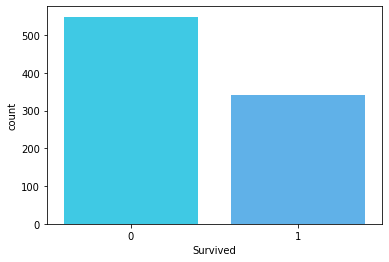

In [77]:
sns.countplot(training_data['Survived'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015AE3A86908>,
      dtype=object)

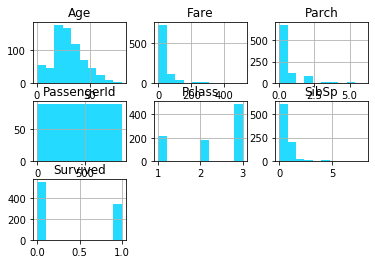

In [78]:
training_data.hist()

In [79]:
training_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [80]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Nettoyage base de donnée (création de fonction)

In [81]:
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Passenger Id

In [38]:
training_data.PassengerId.nunique()
# Saving the passengerId of test data for later use.
passengerId = test_data['PassengerId']

In [39]:
# Since passengerId does not have significant contribution to survival directly therefore we will Drop it.

In [83]:
training_data.drop(labels='PassengerId', axis=1, inplace=True)
test_data.drop(labels='PassengerId', axis=1, inplace=True)

In [84]:
training_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Pclass

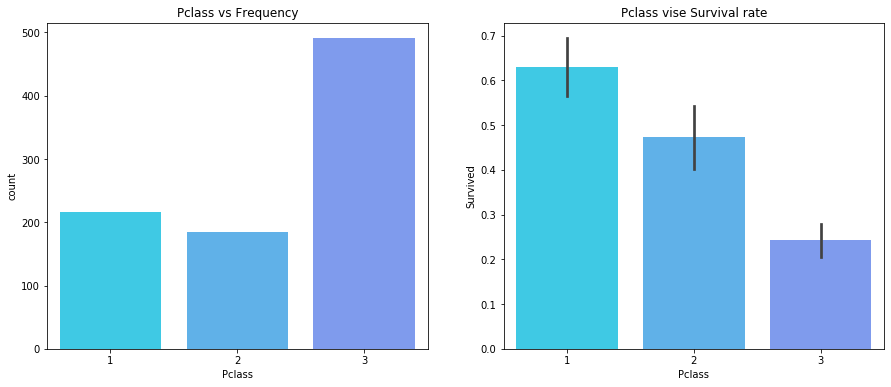

In [85]:
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title("Pclass vs Frequency")
axes[1].set_title("Pclass vise Survival rate")
fig1_pclass = sns.countplot(data=training_data, x='Pclass', ax=axes[0])
fig2_pclass = sns.barplot(data=training_data, x='Pclass',y='Survived', ax=axes[1])

In [86]:
print(training_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [87]:
# As seen the population of passengers as per Pclass is ( 3 > 1 > 2) 
# Survival percentage as per classes is ( 1 > 2 > 3)
# Inference: 1st class passengers have higher survival rate 

### Name

In [88]:
# Making a new feature Title having only the title extracted from the first name
# Making a new feature nameLength telling the length of the name

In [89]:
training_data.Name.nunique()

891

In [90]:
# Title Feature
training_data['Title'] = training_data['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
# Name Leangth
training_data['Name_Len'] = training_data['Name'].apply(lambda x: len(x))
test_data['Name_Len'] = test_data['Name'].apply(lambda x: len(x))
# Dropping the name feature 
training_data.drop(labels='Name', axis=1, inplace=True)
test_data.drop(labels='Name', axis=1, inplace=True)

In [91]:
# Categorizing the name length by simply dividing it with 10.

test_data.Name_Len = (test_data.Name_Len/10).astype(np.int64)+1
training_data.Name_Len = (training_data.Name_Len/10).astype(np.int64)+1

In [92]:
print (training_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

        Title  Survived
0       Capt.  0.000000
1        Col.  0.500000
2        Don.  0.000000
3         Dr.  0.428571
4   Jonkheer.  0.000000
5       Lady.  1.000000
6      Major.  0.500000
7     Master.  0.575000
8       Miss.  0.697802
9       Mlle.  1.000000
10       Mme.  1.000000
11        Mr.  0.156673
12       Mrs.  0.792000
13        Ms.  1.000000
14       Rev.  0.000000
15       Sir.  1.000000
16        the  1.000000


In [93]:
print (training_data[['Name_Len', 'Survived']].groupby(['Name_Len'], as_index=False).mean())

   Name_Len  Survived
0         2  0.220588
1         3  0.331776
2         4  0.493827
3         5  0.750000
4         6  0.800000
5         7  1.000000
6         9  1.000000


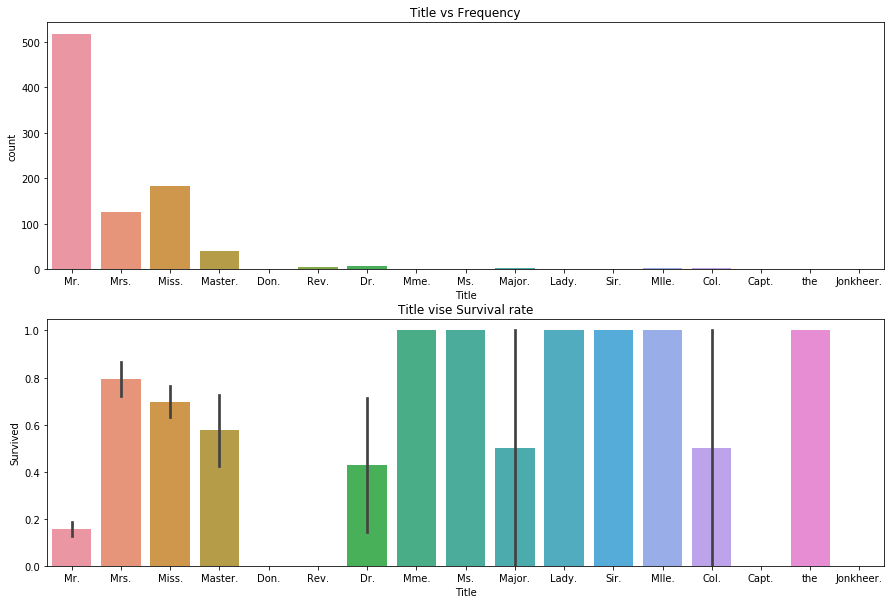

In [94]:
fx, axes = plt.subplots(2, 1, figsize=(15, 10))
axes[0].set_title("Title vs Frequency")
axes[1].set_title("Title vise Survival rate")
fig1_title = sns.countplot(data=training_data, x='Title', ax=axes[0])
fig2_title = sns.barplot(data=training_data, x='Title',y='Survived', ax=axes[1])

#### Gender

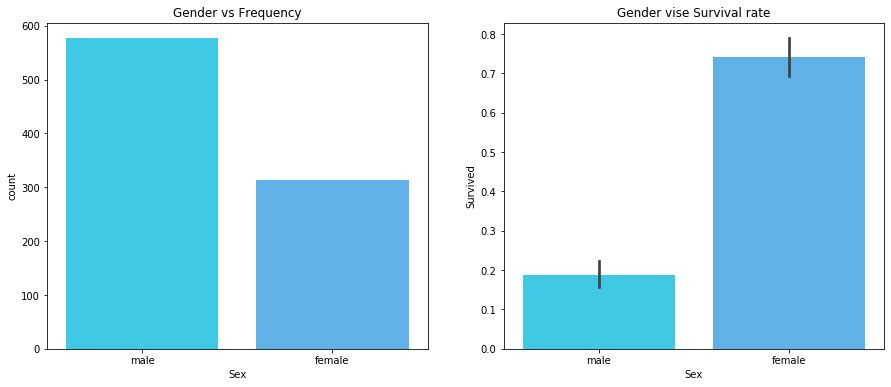

In [95]:
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title("Gender vs Frequency")
axes[1].set_title("Gender vise Survival rate")
fig1_gen = sns.countplot(data=training_data, x='Sex', ax=axes[0])
fig2_gen = sns.barplot(data=training_data, x='Sex', y='Survived', ax=axes[1])

In [96]:
print(training_data[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


#### Age

In [97]:
training_data.Age.isnull().sum()

# Creating a list of age values without null values
training_age_n = training_data.Age.dropna(axis=0)

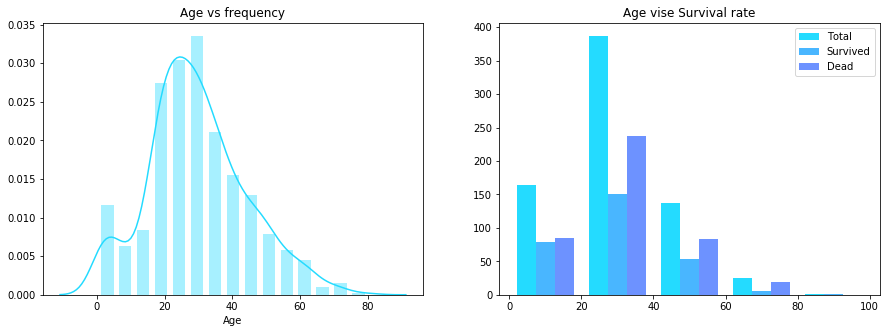

In [98]:
fx, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title("Age vs frequency")
axes[1].set_title("Age vise Survival rate")
fig1_age = sns.distplot(a=training_age_n, bins=15, ax=axes[0], hist_kws={'rwidth':0.7})

# Creating a new list of survived and dead

pass_survived_age = training_data[training_data.Survived == 1].Age
pass_dead_age = training_data[training_data.Survived == 0].Age

axes[1].hist([training_data.Age, pass_survived_age, pass_dead_age], bins=5, range=(0, 100), label=['Total', 'Survived', 'Dead'])
axes[1].legend()
plt.show()

In [63]:
# Taking care of null values in Age 
full_data = pd.concat([training_data, test_data])

In [100]:
# Null Ages in Training set (177 null values)
train_age_mean = full_data.Age.mean()
train_age_std = full_data.Age.std()
train_age_null = training_data.Age.isnull().sum()
rand_tr_age = np.random.randint(train_age_mean - train_age_std, train_age_mean + train_age_std, size=train_age_null)
training_data['Age'][np.isnan(training_data['Age'])] = rand_tr_age
training_data['Age'] = training_data['Age'].astype(int) + 1

# Null Ages in Test set (86 null values)
test_age_mean = full_data.Age.mean()
test_age_std = full_data.Age.std()
test_age_null = test_data.Age.isnull().sum()
rand_ts_age = np.random.randint(test_age_mean - test_age_std, test_age_mean + test_age_std, size=test_age_null)
test_data['Age'][np.isnan(test_data['Age'])] = rand_ts_age
test_data['Age'] = test_data['Age'].astype(int)

training_data.Age = (training_data.Age/15).astype(np.int64)
test_data.Age = (test_data.Age/15).astype(np.int64) + 1

In [99]:
print(training_data[['Age', 'Survived']].groupby(['Age'], as_index = False).mean())

      Age  Survived
0    0.42       1.0
1    0.67       1.0
2    0.75       1.0
3    0.83       1.0
4    0.92       1.0
..    ...       ...
83  70.00       0.0
84  70.50       0.0
85  71.00       0.0
86  74.00       0.0
87  80.00       1.0

[88 rows x 2 columns]


#### SibSp and PArch

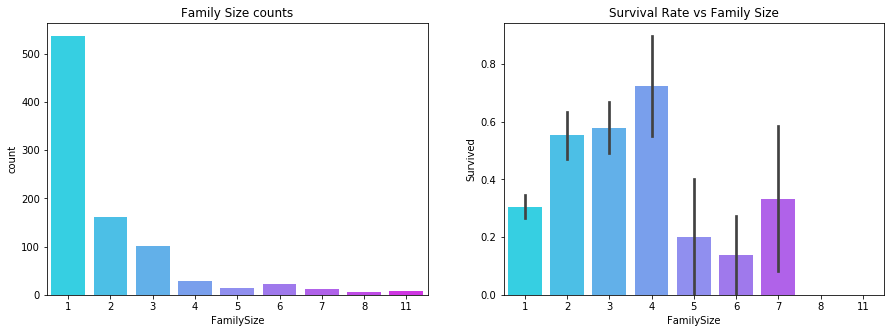

In [101]:
training_data['FamilySize'] = training_data['SibSp'] + training_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
fx, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title('Family Size counts')
axes[1].set_title('Survival Rate vs Family Size')
fig1_family = sns.countplot(x=training_data.FamilySize, ax=axes[0], palette='cool')
fig2_family = sns.barplot(x=training_data.FamilySize, y=training_data.Survived, ax=axes[1], palette='cool')

In [102]:
print(training_data[['FamilySize', 'Survived']].groupby(training_data['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0         1.0  0.303538
1         2.0  0.552795
2         3.0  0.578431
3         4.0  0.724138
4         5.0  0.200000
5         6.0  0.136364
6         7.0  0.333333
7         8.0  0.000000
8        11.0  0.000000


IsAlone

In [103]:
# wheather or not the passenger was alone ?

training_data['isAlone'] = training_data['FamilySize'].map(lambda x: 1 if x == 1 else 0)
test_data['isAlone'] = test_data['FamilySize'].map(lambda x: 1 if x == 1 else 0)

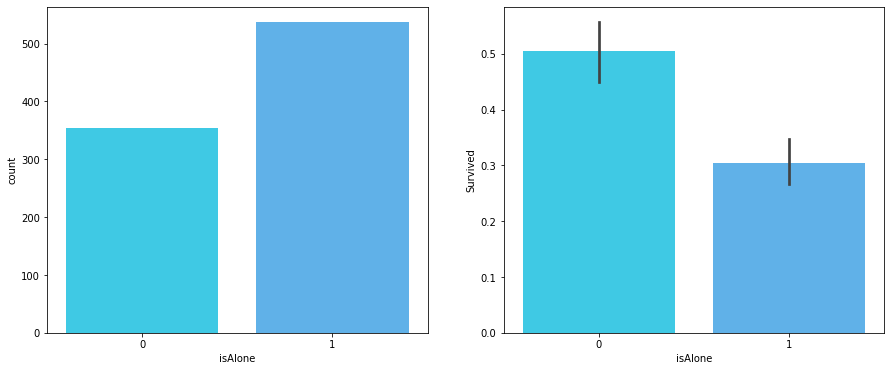

In [104]:
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
fig1_alone = sns.countplot(data=training_data, x='isAlone', ax=axes[0])
fig2_alone = sns.barplot(data=training_data, x='isAlone', y='Survived', ax=axes[1])

In [105]:
training_data.drop(labels=['SibSp', 'Parch'], axis=1, inplace=True)
test_data.drop(labels=['SibSp', 'Parch'], axis=1, inplace=True)
training_data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Name_Len,FamilySize,isAlone
0,0,3,male,1,A/5 21171,7.2500,NaN,S,Mr.,3,2,0
1,1,1,female,2,PC 17599,71.2833,C85,C,Mrs.,6,2,0
2,1,3,female,1,STON/O2. 3101282,7.9250,NaN,S,Miss.,3,1,1
3,1,1,female,2,113803,53.1000,C123,S,Mrs.,5,2,0
4,0,3,male,2,373450,8.0500,NaN,S,Mr.,3,1,1


### Ticket

In [106]:
# Making a new feature ticket length

training_data['Ticket_Len'] = training_data['Ticket'].apply(lambda x: len(x))
test_data['Ticket_Len'] = test_data['Ticket'].apply(lambda x: len(x))

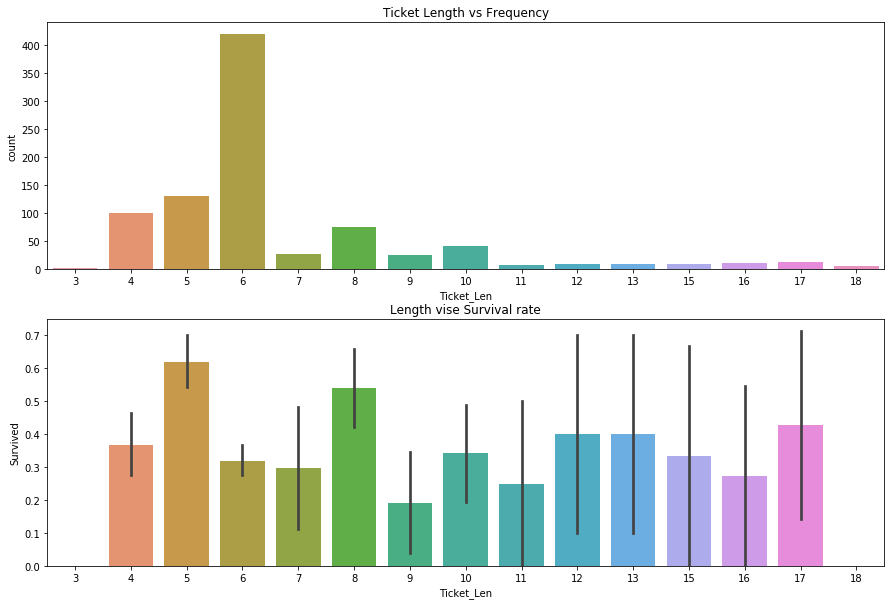

In [107]:
fx, axes = plt.subplots(2, 1, figsize=(15, 10))
axes[0].set_title("Ticket Length vs Frequency")
axes[1].set_title("Length vise Survival rate")
fig1_tlen = sns.countplot(data=training_data, x='Ticket_Len', ax=axes[0])
fig2_tlen = sns.barplot(data=training_data, x='Ticket_Len',y='Survived', ax=axes[1])

In [108]:
print(training_data[['Ticket_Len', 'Survived']].groupby(training_data['Ticket_Len'], as_index=False).mean())

    Ticket_Len  Survived
0          3.0  0.000000
1          4.0  0.366337
2          5.0  0.618321
3          6.0  0.319809
4          7.0  0.296296
5          8.0  0.539474
6          9.0  0.192308
7         10.0  0.341463
8         11.0  0.250000
9         12.0  0.400000
10        13.0  0.400000
11        15.0  0.333333
12        16.0  0.272727
13        17.0  0.428571
14        18.0  0.000000


In [109]:
training_data.drop(labels='Ticket', axis=1, inplace=True)
test_data.drop(labels='Ticket', axis=1, inplace=True)
training_data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len
0,0,3,male,1,7.2500,NaN,S,Mr.,3,2,0,9
1,1,1,female,2,71.2833,C85,C,Mrs.,6,2,0,8
2,1,3,female,1,7.9250,NaN,S,Miss.,3,1,1,16
3,1,1,female,2,53.1000,C123,S,Mrs.,5,2,0,6
4,0,3,male,2,8.0500,NaN,S,Mr.,3,1,1,6


#### fare

In [110]:
# Fare has 0 null values in training data but 1 null values in test data

test_data.Fare.describe()

# mean of fare in test data is 35 we will replace nul value with mean
test_data['Fare'][np.isnan(test_data['Fare'])] = test_data.Fare.mean()

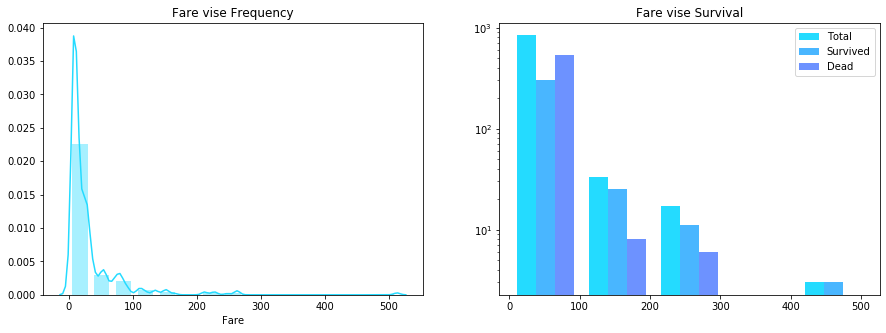

In [111]:
fx, axes = plt.subplots(1, 2, figsize=(15,5))
fig1_fare = sns.distplot(a=training_data.Fare, bins=15, ax=axes[0], hist_kws={'rwidth':0.7})
fig1_fare.set_title('Fare vise Frequency')

# Creating a new list of survived and dead

pass_survived_fare = training_data[training_data.Survived == 1].Fare
pass_dead_fare = training_data[training_data.Survived == 0].Fare

axes[1].hist(x=[training_data.Fare, pass_survived_fare, pass_dead_fare], bins=5, label=['Total', 'Survived', 'Dead'], \
        log=True)
axes[1].legend()
axes[1].set_title('Fare vise Survival')
plt.show()

In [112]:
print(training_data[['Fare','Survived']].groupby(['Fare'], as_index = False).mean())

         Fare  Survived
0      0.0000  0.066667
1      4.0125  0.000000
2      5.0000  0.000000
3      6.2375  0.000000
4      6.4375  0.000000
..        ...       ...
243  227.5250  0.750000
244  247.5208  0.500000
245  262.3750  1.000000
246  263.0000  0.500000
247  512.3292  1.000000

[248 rows x 2 columns]


In [113]:
training_data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len
0,0,3,male,1,7.2500,NaN,S,Mr.,3,2,0,9
1,1,1,female,2,71.2833,C85,C,Mrs.,6,2,0,8
2,1,3,female,1,7.9250,NaN,S,Miss.,3,1,1,16
3,1,1,female,2,53.1000,C123,S,Mrs.,5,2,0,6
4,0,3,male,2,8.0500,NaN,S,Mr.,3,1,1,6


#### Cabin

In [114]:
# Null values in test data
cabin_null = float(test_data.Cabin.isnull().sum())
print(cabin_null/len(test_data) *100)

78.22966507177034


In [115]:
# Null values in training data
cabin_null = float(training_data.Cabin.isnull().sum())
print(cabin_null/len(training_data) *100)

77.10437710437711


In [116]:
# Making a new feature hasCabin which is 1 if cabin is available else 0
training_data['hasCabin'] = training_data.Cabin.notnull().astype(int)
test_data['hasCabin'] = test_data.Cabin.notnull().astype(int)

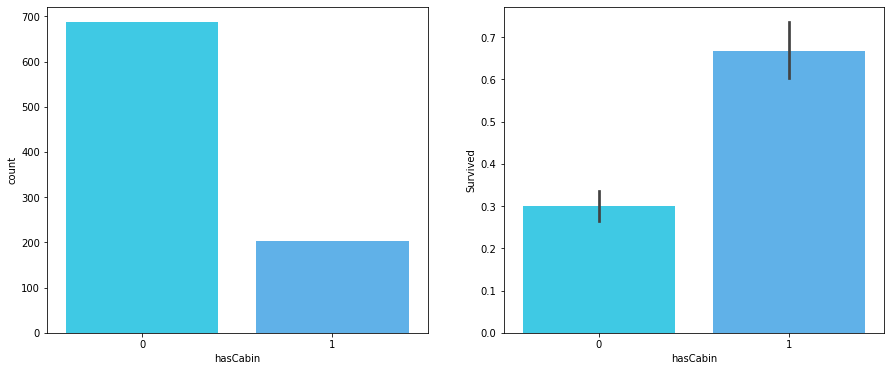

In [117]:
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
fig1_hascabin = sns.countplot(data=training_data, x='hasCabin', ax=axes[0])
fig2_hascabin = sns.barplot(data=training_data, x='hasCabin', y='Survived', ax=axes[1])

In [118]:
training_data.drop(labels='Cabin', axis=1, inplace=True)
training_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len,hasCabin
0,0,3,male,1,7.2500,S,Mr.,3,2,0,9,0
1,1,1,female,2,71.2833,C,Mrs.,6,2,0,8,1
2,1,3,female,1,7.9250,S,Miss.,3,1,1,16,0
3,1,1,female,2,53.1000,S,Mrs.,5,2,0,6,1
4,0,3,male,2,8.0500,S,Mr.,3,1,1,6,0


In [119]:
test_data.drop(labels='Cabin', axis=1, inplace=True)
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len,hasCabin
0,3,male,3,7.8292,Q,Mr.,2,1,1,6,0
1,3,female,4,7.0000,S,Mrs.,4,2,0,6,0
2,2,male,5,9.6875,Q,Mr.,3,1,1,6,0
3,3,male,2,8.6625,S,Mr.,2,1,1,6,0
4,3,female,2,12.2875,S,Mrs.,5,3,0,7,0


Embarked

In [120]:
# Embarked has 2 null values in the training data

In [121]:
training_data.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [122]:
training_data['Embarked'] = training_data['Embarked'].fillna('S')

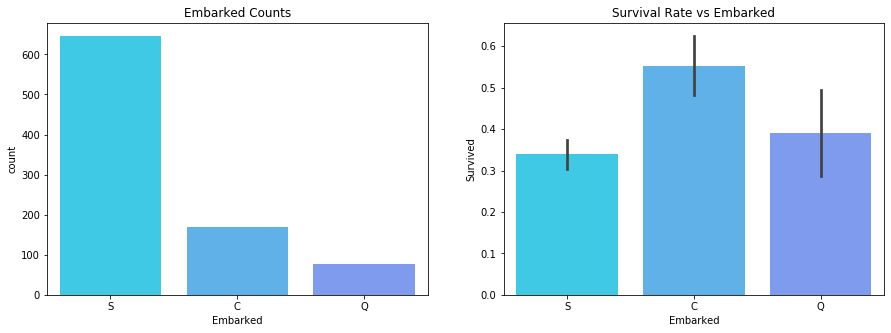

In [123]:
fx, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title('Embarked Counts')
axes[1].set_title('Survival Rate vs Embarked')
fig1_embarked = sns.countplot(x=training_data.Embarked, ax=axes[0])
fig2_embarked = sns.barplot(x=training_data.Embarked, y=training_data.Survived, ax=axes[1])

In [124]:
print(training_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [125]:
print(training_data[['Embarked', 'Fare']].groupby(['Embarked'], as_index = False).mean())

  Embarked       Fare
0        C  59.954144
1        Q  13.276030
2        S  27.243651


### Cleaning the data for Classification

In [127]:
# Splitting the dataset into dependent and independent features
training_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len,hasCabin
0,0,3,male,1,7.2500,S,Mr.,3,2,0,9,0
1,1,1,female,2,71.2833,C,Mrs.,6,2,0,8,1
2,1,3,female,1,7.9250,S,Miss.,3,1,1,16,0
3,1,1,female,2,53.1000,S,Mrs.,5,2,0,6,1
4,0,3,male,2,8.0500,S,Mr.,3,1,1,6,0


In [128]:
X = training_data.iloc[:, 1:12].values
y = training_data.iloc[:, 0].values

In [129]:
label_encoder_sex_tr = LabelEncoder()
label_encoder_title_tr = LabelEncoder()
label_encoder_embarked_tr = LabelEncoder()
X[:, 1] = label_encoder_sex_tr.fit_transform(X[:, 1])
X[:, 5] = label_encoder_title_tr.fit_transform(X[:, 5])
X[:, 4] = label_encoder_embarked_tr.fit_transform(X[:, 4])

In [130]:
# Splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17)

In [131]:
# Feature Scaling
scaler_x = MinMaxScaler((-1,1))
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

### Random Forest

In [134]:
accuracies = []
rdmf = RandomForestClassifier(n_estimators=20, criterion='entropy')
rdmf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
rdmf_score = rdmf.score(X_test, y_test)
rdmf_score_tr = rdmf.score(X_train, y_train)
accuracies.append(rdmf_score)
print(rdmf_score)
print(rdmf_score_tr)

0.8157894736842105
0.9715832205683356


In [138]:
y_pred = rdmf.predict(X_test)

In [139]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        89
           1       0.82      0.71      0.76        63

    accuracy                           0.82       152
   macro avg       0.82      0.80      0.81       152
weighted avg       0.82      0.82      0.81       152



In [140]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [141]:
confusion = pd.DataFrame(conf_matrix)
confusion

,0,1
0,79,10
1,18,45


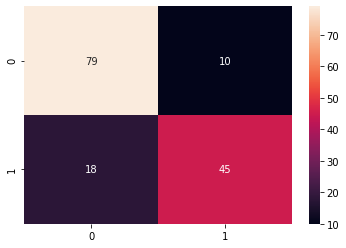

In [144]:
sns.heatmap(confusion, annot=True)